In [1]:
!pip install plotly_express

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 27.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 31.1 MB/s eta 0:00:00m eta 0:00:01:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.8/430.8 kB 40.9 MB/s eta 0:00:00


In [4]:
!pip install xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 6.2 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_excel('https://github.com/PinkWink/ML_tutorial/raw/refs/heads/master/dataset/titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


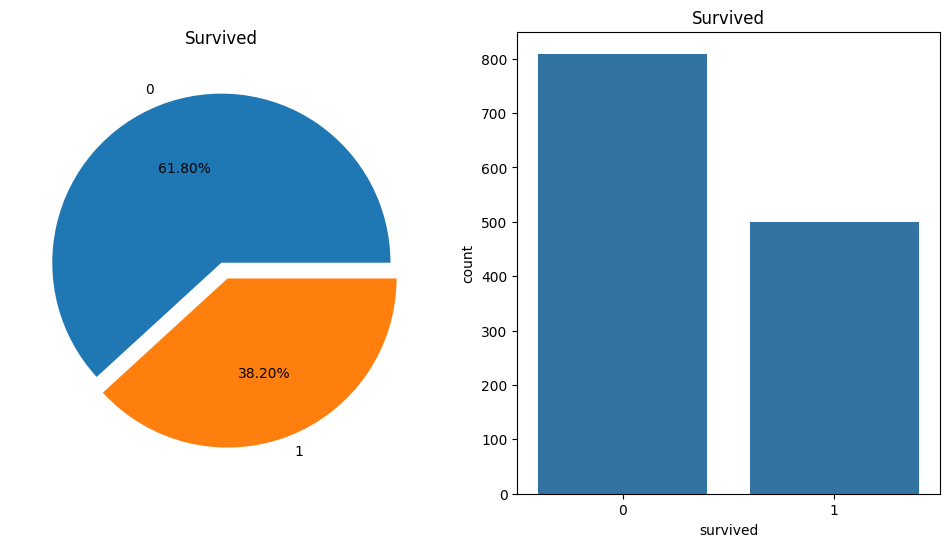

In [8]:
f,ax = plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0, 0.1],
autopct = '%1.2f%%', ax = ax [0])

ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='survived', data = raw_data, ax= ax[1])
ax[1].set_title('Survived')
plt.show()

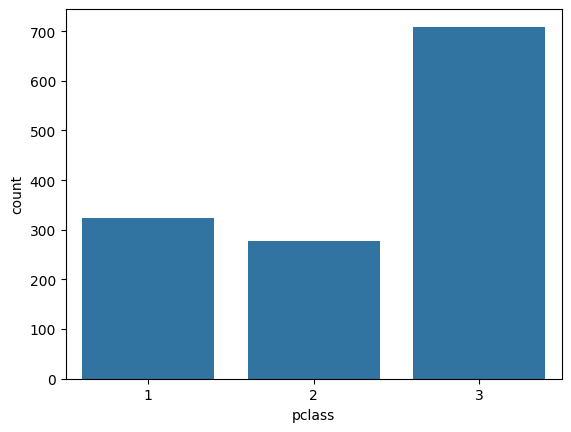

In [14]:
ad = sns.countplot(x="pclass", data = raw_data)

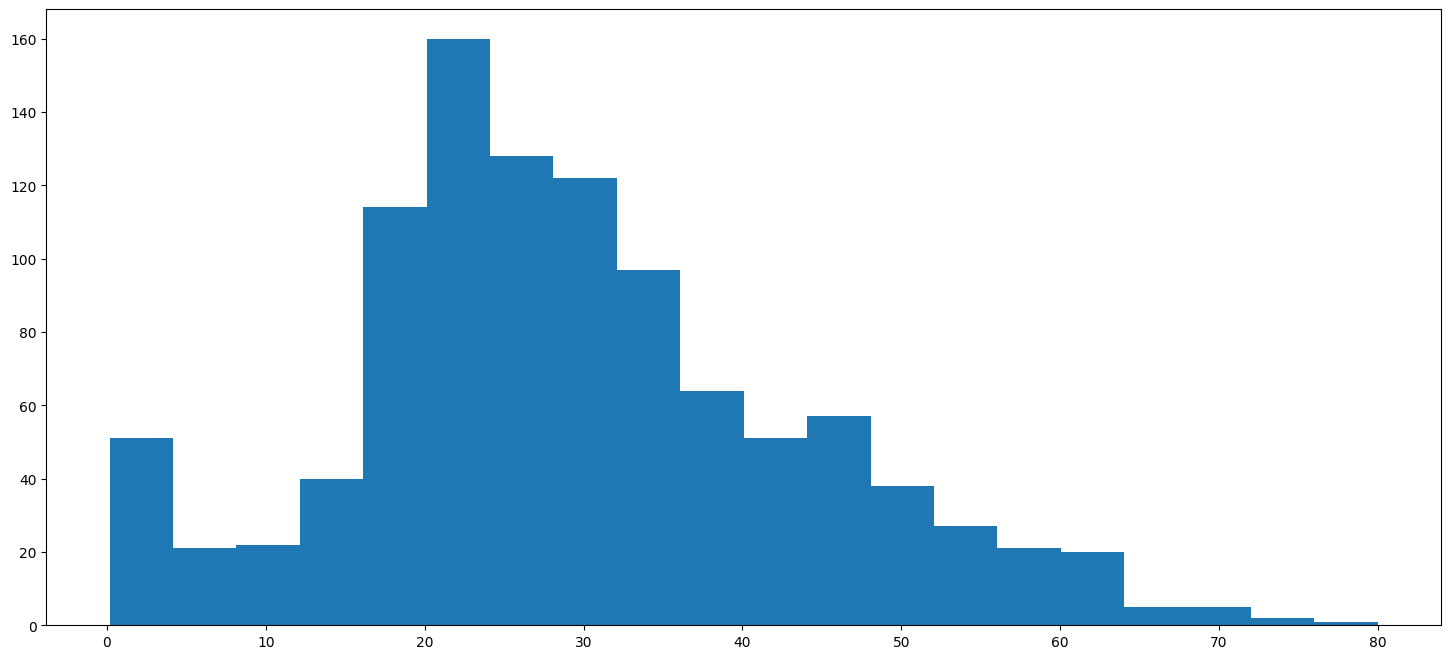

In [17]:
raw_data['age'].hist(bins=20, figsize = (18,8), grid = False);

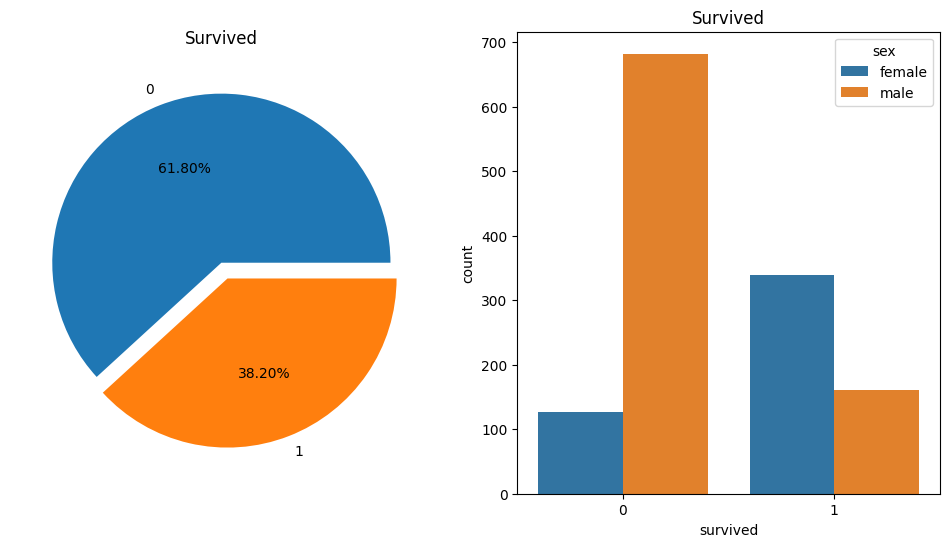

In [18]:
f,ax=plt.subplots(1,2,figsize = (12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],
autopct = '%1.2f%%', ax=ax[0])

ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='survived', data = raw_data, ax = ax[1], hue = 'sex')
ax[1].set_title('Survived')
plt.show()

In [19]:
raw_data.groupby('pclass')['survived'].mean()

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

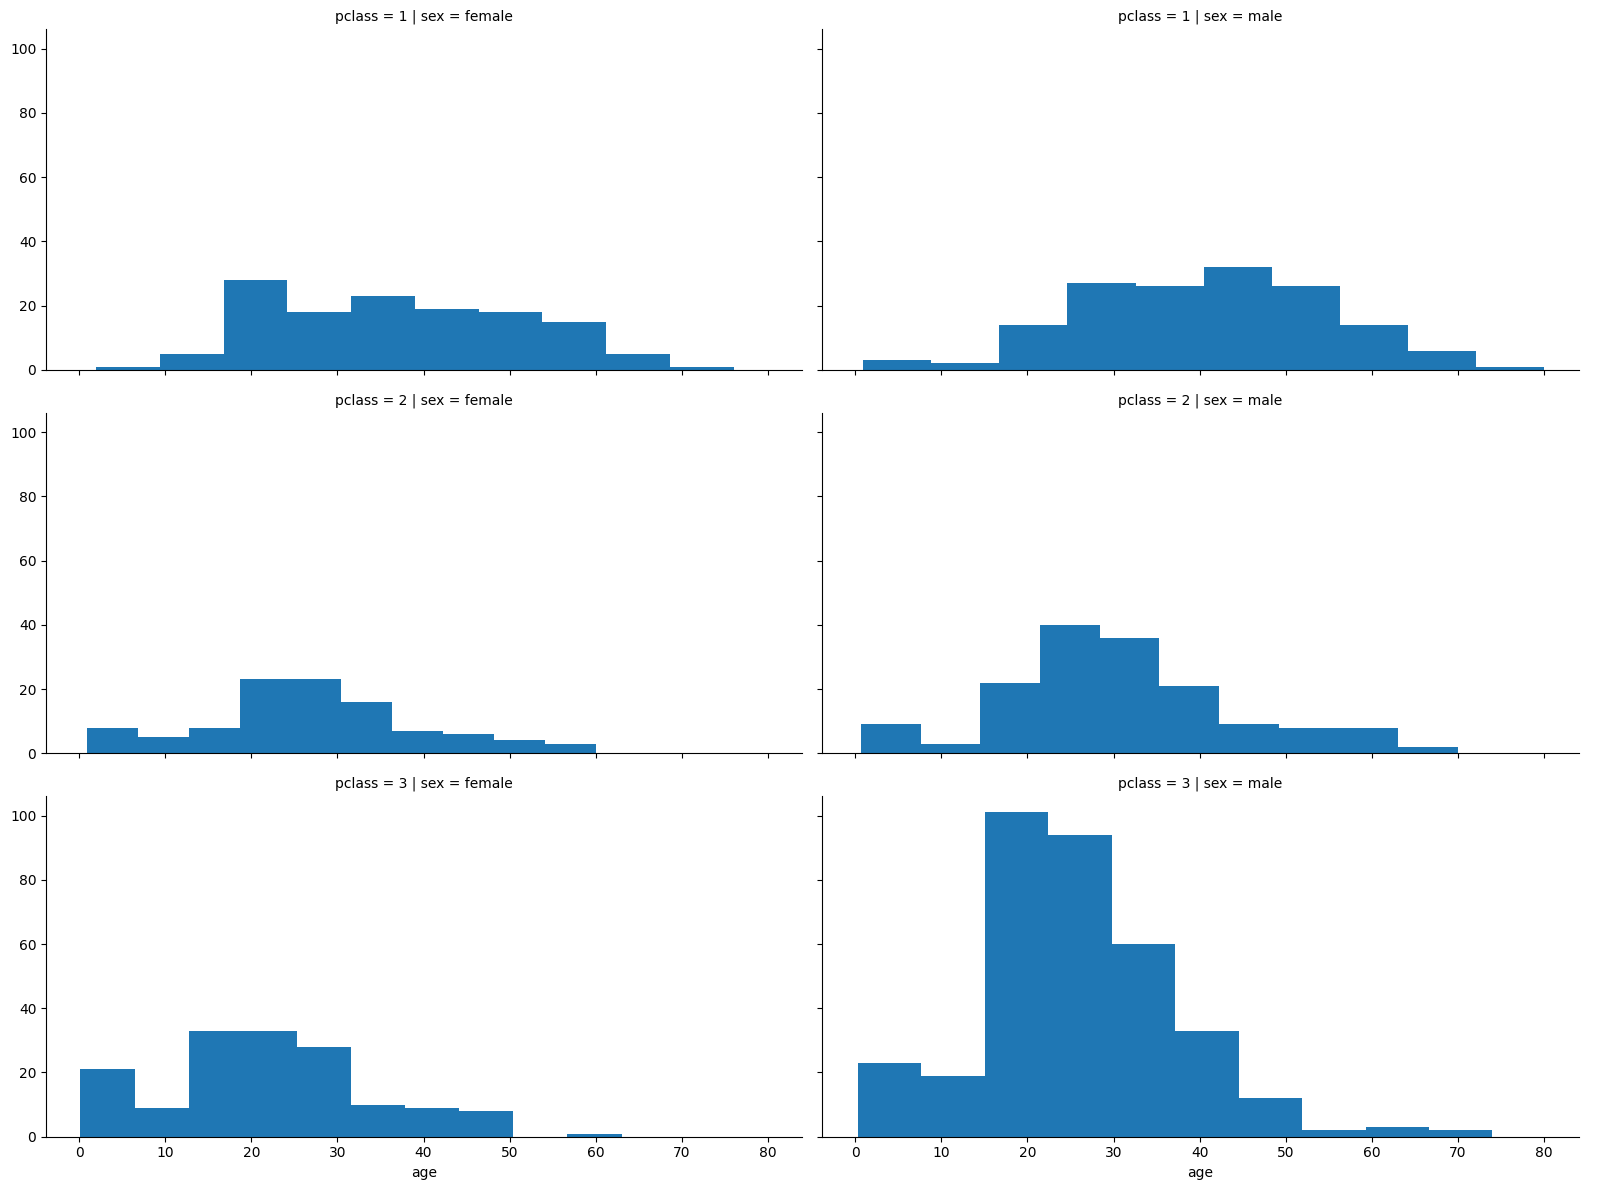

In [20]:
grid = sns.FacetGrid(raw_data, row = 'pclass', col = 'sex', height = 4, aspect = 2)
grid.map(plt.hist, 'age', bins = 10)
grid.add_legend()

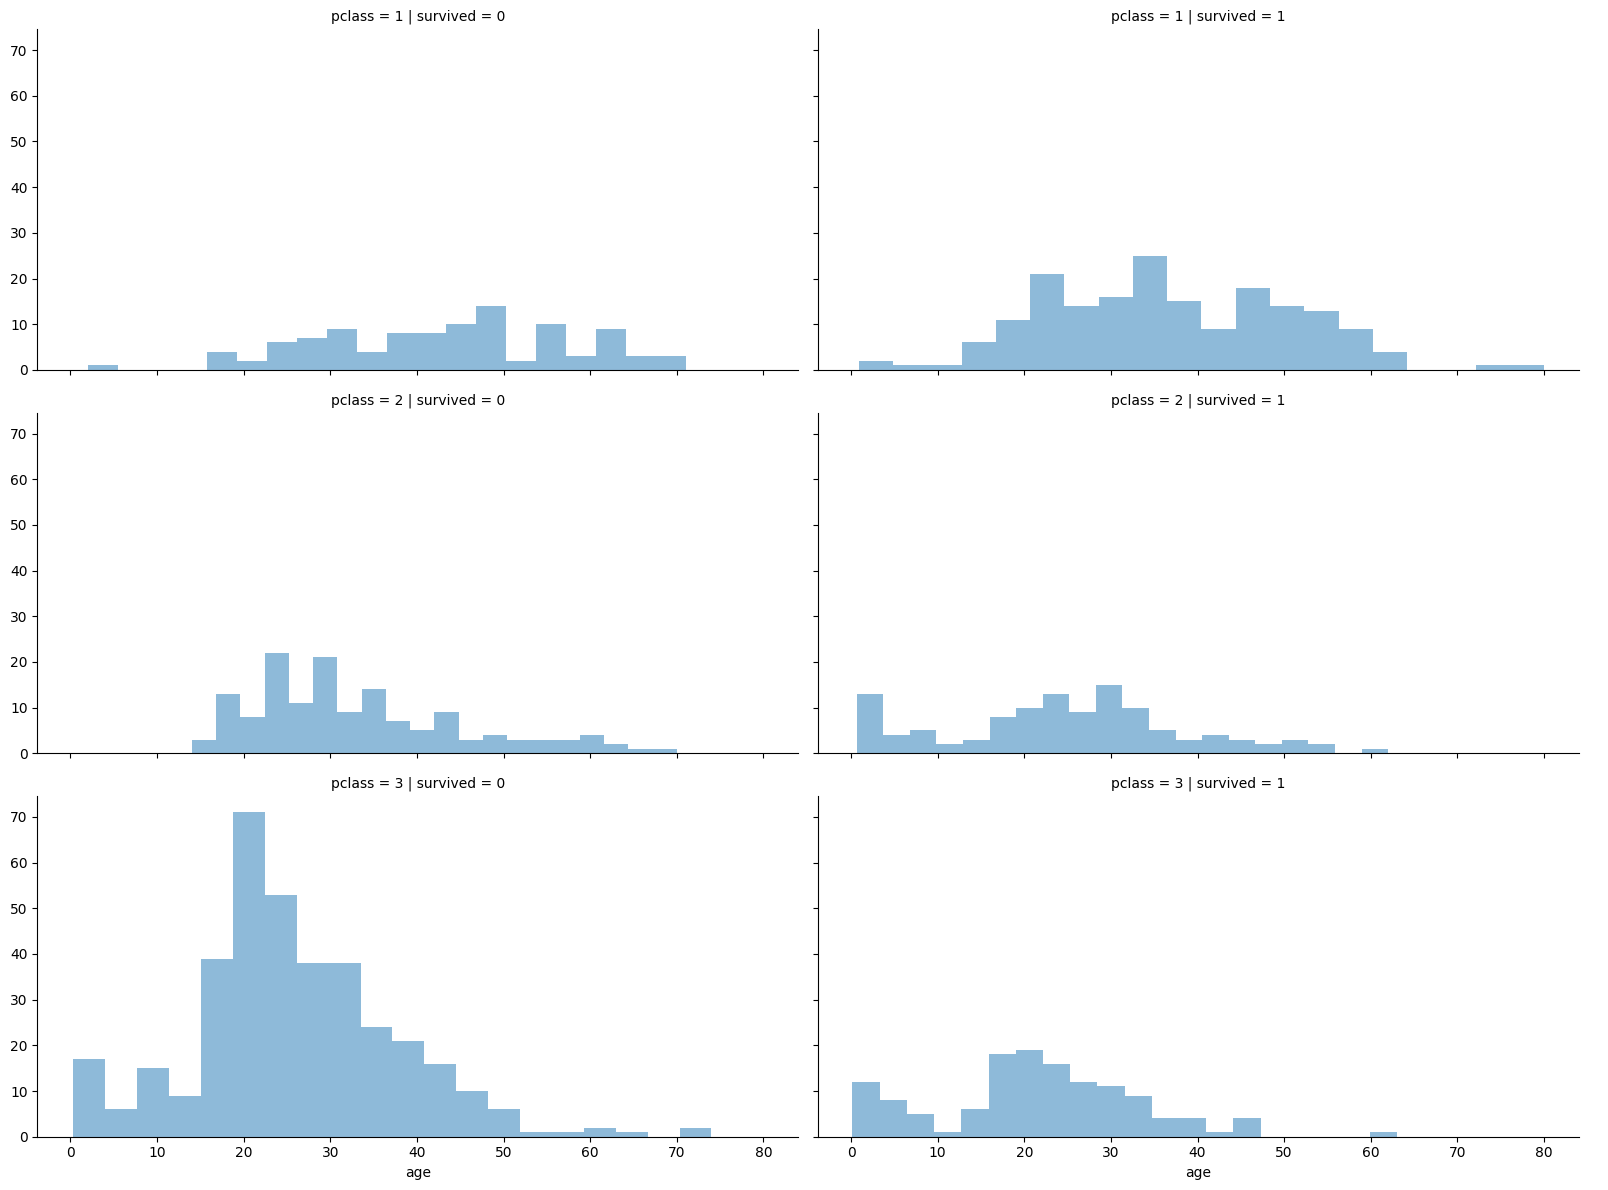

In [23]:
grid = sns.FacetGrid(raw_data, col = 'survived', row = 'pclass', height = 4, aspect = 2)
grid.map(plt.hist, 'age', alpha = .5, bins = 20)
grid.add_legend();

In [25]:
raw_data['age_cat'] = pd.cut(raw_data['age'], bins = [0, 7, 15, 30, 60, 100], 
include_lowest = True,
labels = ['baby', 'teen', 'young', 'adult', 'old'])
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


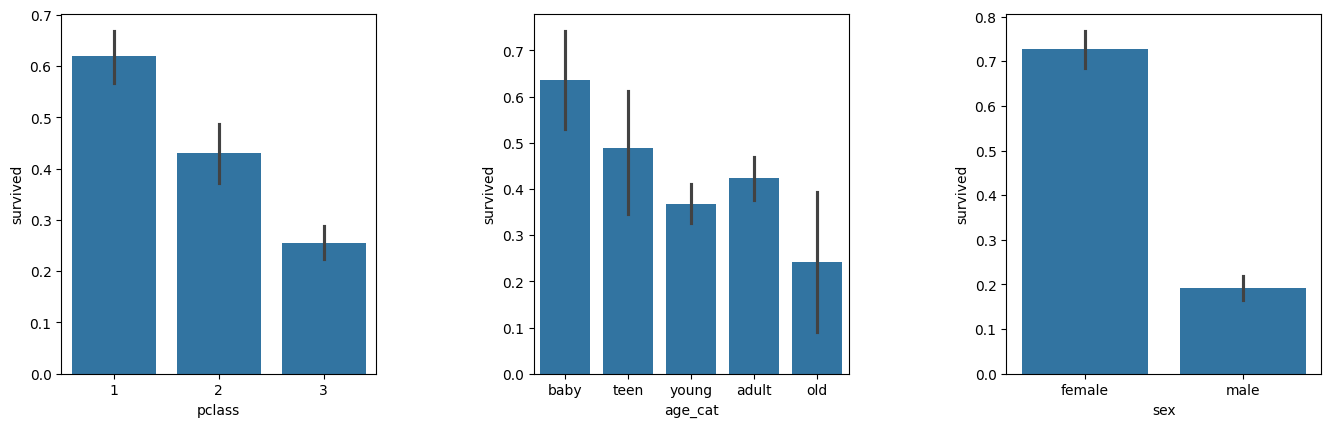

In [26]:
plt.figure(figsize=[14, 4])
plt.subplot(131)
sns.barplot(x='pclass', y='survived', data=raw_data)
plt.subplot(132)
sns.barplot(x='age_cat', y='survived', data=raw_data)
plt.subplot(133)
sns.barplot(x='sex', y='survived', data=raw_data)
plt.subplots_adjust(top = 1, bottom = 0.1, left = 0.10, right = 1, hspace = 0.5 , wspace = 0.5)
plt.show()

In [28]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


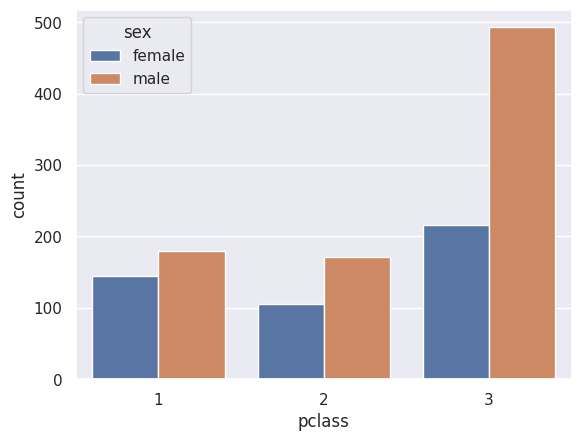

In [31]:
sns.set_theme(style = "darkgrid")
ad = sns.countplot(x = "pclass", hue = "sex", data=raw_data)

In [32]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
dtypes: category(1), float64(3), int64(4), object(7)
memory usage: 144.8+ KB


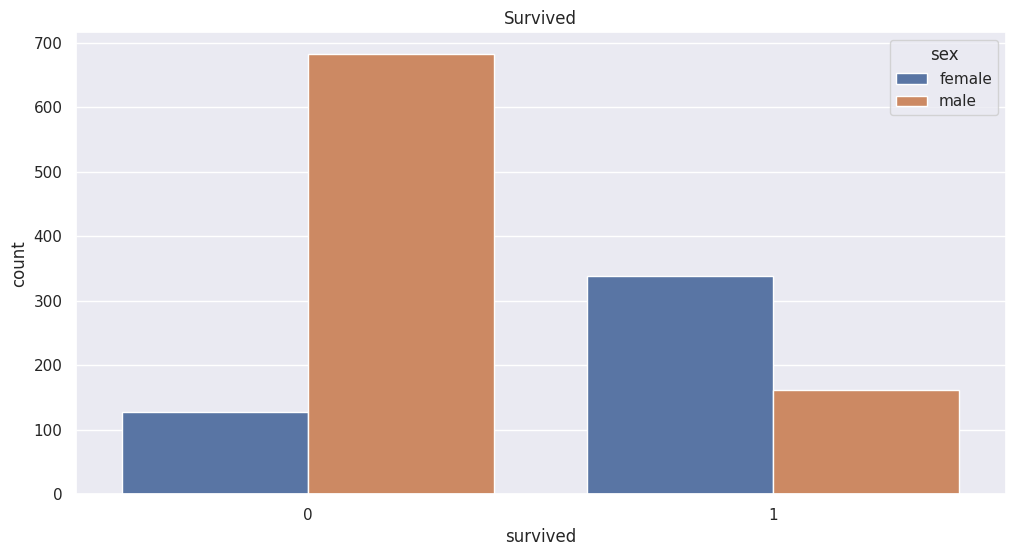

In [38]:
ax = plt.subplots(figsize = (12, 6))

sns.countplot(x='survived', hue ='sex', data = raw_data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

In [39]:
raw_data['name'][0]

'Allen, Miss. Elisabeth Walton'

In [40]:
raw_data['name'][0].split(',')[1]

' Miss. Elisabeth Walton'

In [41]:
test = lambda x: x**2
test(2)

4

In [42]:
list(map(test,range(5)))

[0, 1, 4, 9, 16]

In [43]:
conversion_rare = lambda x: x.split(',')[1].split('.')[0].strip()
raw_data['title'] = raw_data['name'].map(conversion_rare)

titles = raw_data['title'].unique()
titles

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [44]:
raw_data['title'] = raw_data['title'].replace('Mlle', 'Miss')
raw_data['title'] = raw_data['title'].replace('Ms', 'Miss')
raw_data['title'] = raw_data['title'].replace('Mme', 'Mrs')

Rare_f = ['Lady', 'Dona', 'the Countess']
Rare_m = ['Capt', 'Master', 'Col', 'Don','Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

for each in Rare_f:
    raw_data['title'] = raw_data['title'].replace(each, 'Rare_f')

for each in Rare_m:
    raw_data['title'] = raw_data['title'].replace(each, 'Rare_m')

raw_data['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

In [47]:
print(raw_data[['title', 'survived']]. groupby(['title'] , as_index=False).mean())

    title  survived
0    Miss  0.678030
1      Mr  0.162483
2     Mrs  0.787879
3  Rare_f  1.000000
4  Rare_m  0.448276


In [48]:
raw_data['sex'].unique()

array(['female', 'male'], dtype=object)

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(raw_data['sex'])
raw_data['gender'] = le.transform(raw_data['sex'])
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs,0


In [50]:
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
 16  gender     1045 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(8)
memory usage: 140.0+ KB


In [51]:
from sklearn.model_selection import train_test_split

X = raw_data[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]
y = raw_data['survived']

X_train, X_test, y_train, y_test= \
train_test_split(X, y, test_size = 0.2, random_state= 13)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth = 4, random_state = 13)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.7655502392344498


In [56]:
import numpy as np
dicaprio = np.array([[3, 18, 0, 0, 5, 1]])
print('Decaprio : ', dt.predict_proba(dicaprio)[0,1])

Decaprio :  0.16728624535315986


/home/kyle/venv/ai/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [57]:
winslet = np.array([[1, 16, 1, 1, 100, 0]])
print("Winslet : ", dt.predict_proba(winslet)[0,1])

Winslet :  1.0


/home/kyle/venv/ai/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


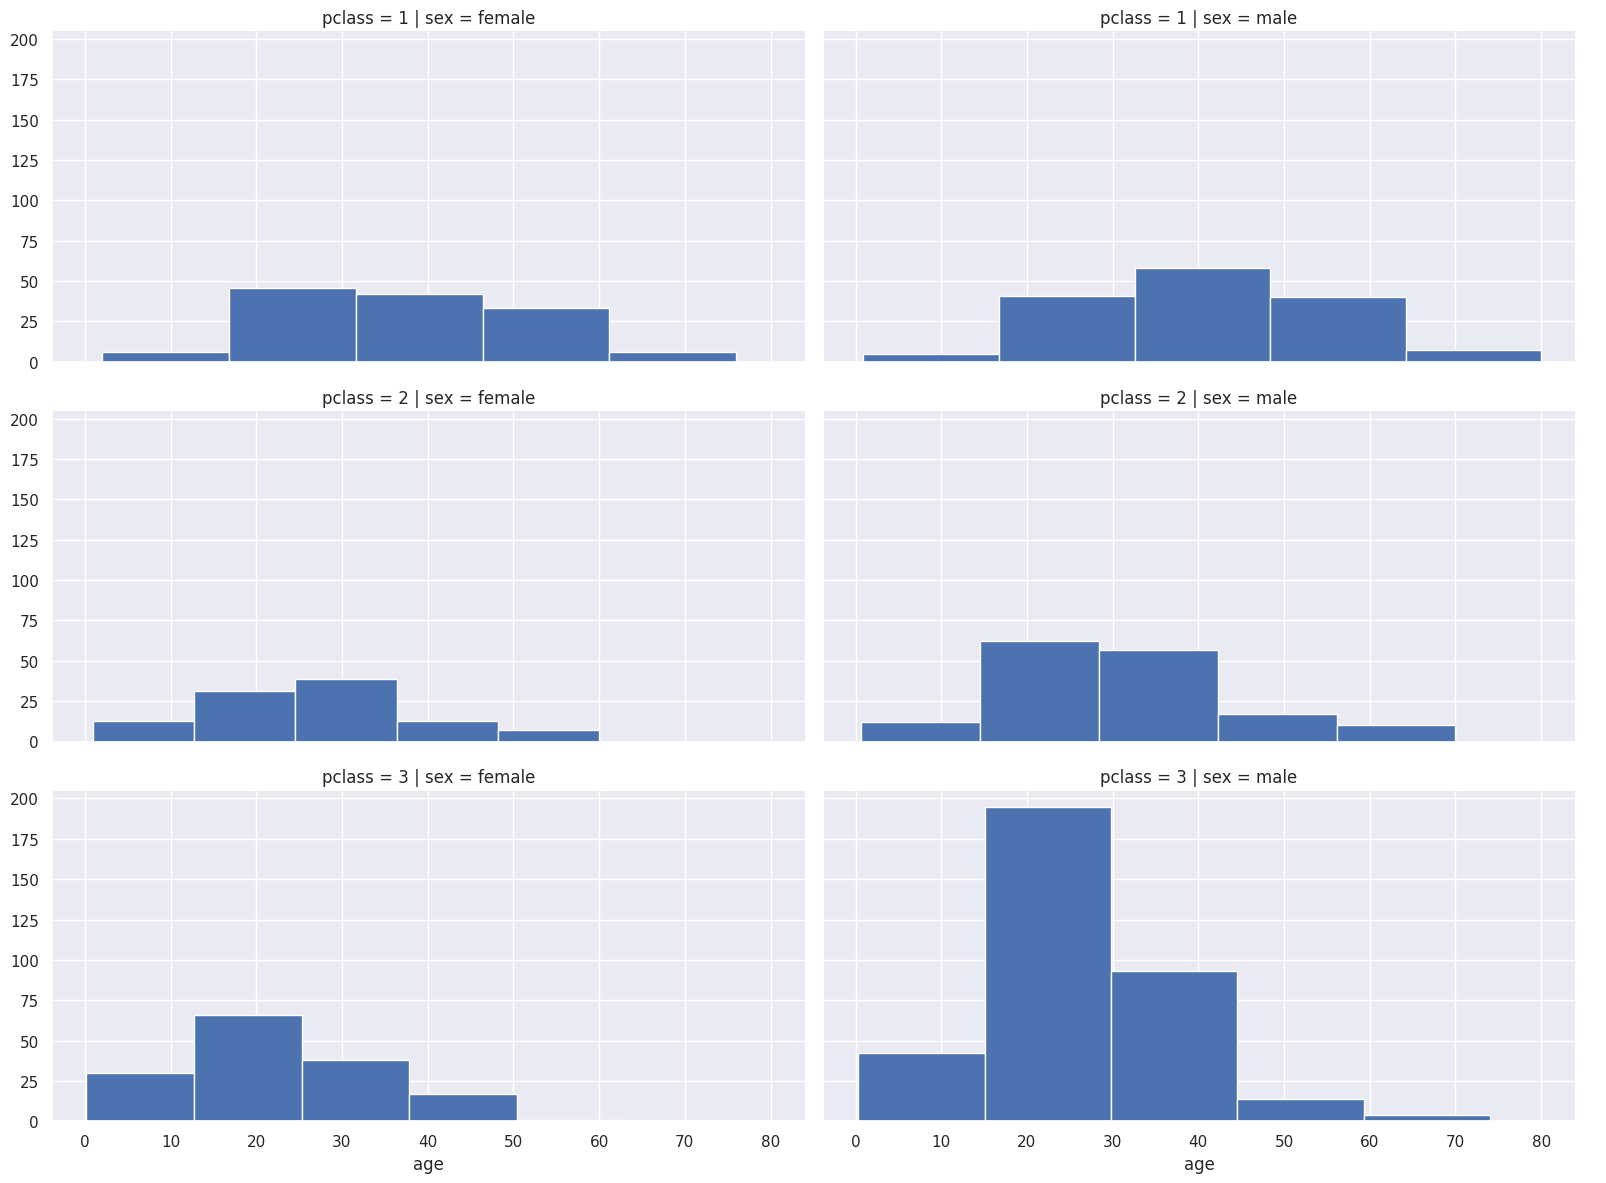

In [58]:
grid = sns.FacetGrid(raw_data, row = 'pclass', col = 'sex', height = 4, aspect = 2)
grid.map(plt.hist, 'age', bins = 5)
grid.add_legend()